In [1]:
import pandas as pd
import numpy as np
import os 

from scale.plot import plot_confusion_matrix, plot_embedding
from scale.utils import read_labels, reassign_cluster_with_ref
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, f1_score

%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
/home/xionglei/miniconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


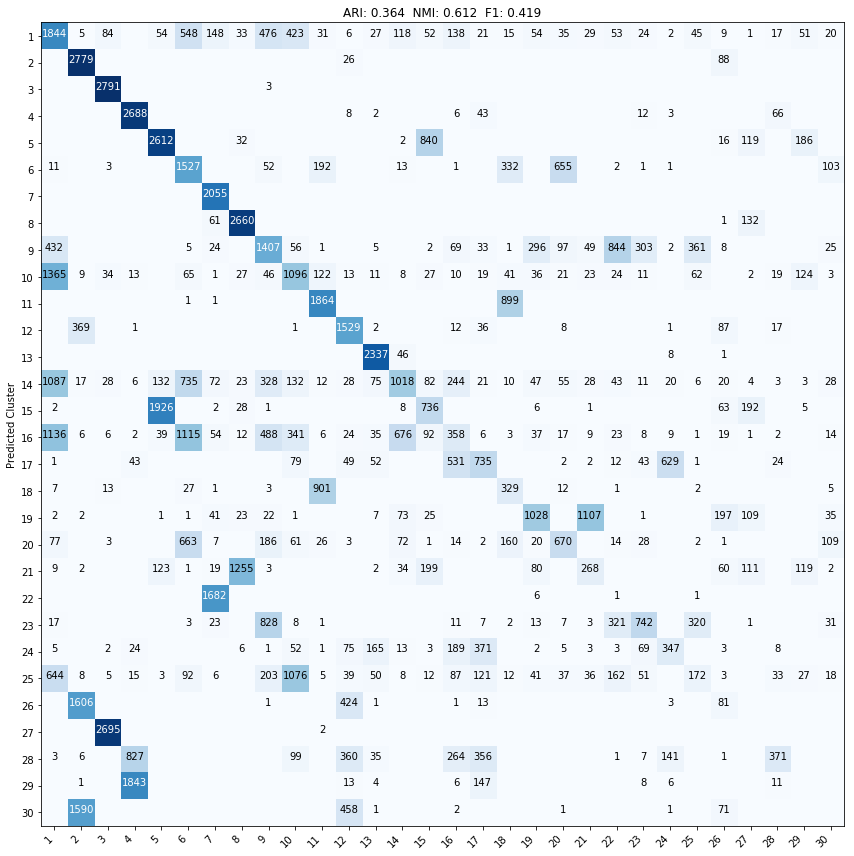

In [2]:
inputdir = 'data/mouse_atlas/'
outdir = 'result/mouse_atlas/'

pred, pred_classes = read_labels(os.path.join(outdir, 'cluster_assignments.txt'))

ref_file = os.path.join(inputdir, 'labels.txt')
ref, classes, le = read_labels(ref_file, return_enc=True)
show_yticks = True
pred = reassign_cluster_with_ref(pred, ref)
ari = adjusted_rand_score(ref, pred)
nmi = normalized_mutual_info_score(ref, pred)
f1 = f1_score(ref, pred, average='micro')
title = "ARI: {:.3f}  NMI: {:.3f}  F1: {:.3f}".format(ari, nmi, f1)
cm = confusion_matrix(pred, ref)

plot_confusion_matrix(cm, classes, pred_classes+1, title=title, normalize=False, 
                  figsize=(12,12),show_cbar=False, show_xticks=True, show_yticks=show_yticks)  

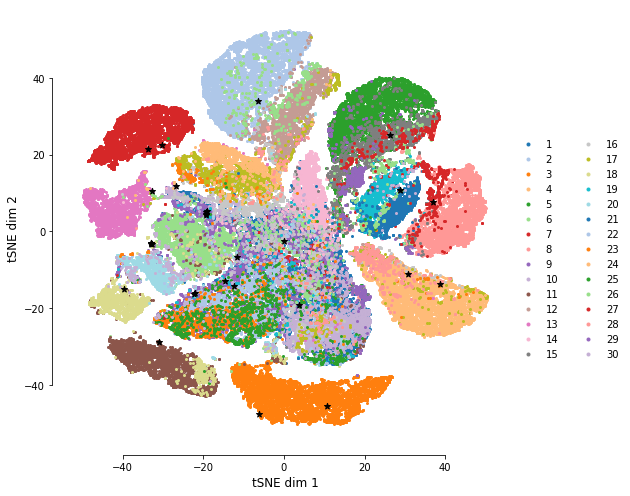

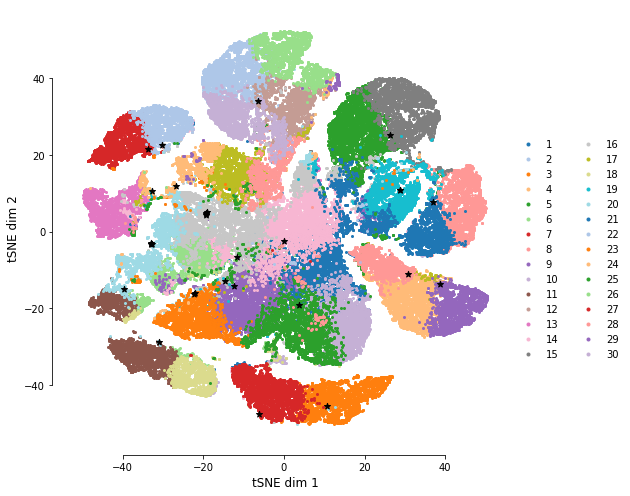

In [5]:
emb = np.loadtxt(outdir+'tsne.txt')
N = len(ref)

for label in [ref+1, pred+1]:
    plot_embedding(emb[:N], label, marker=emb[N:], ncol=2, markersize=4,figsize=(8, 8))